### DSPT6 - Adding Data Science to a Web Application

The purpose of this notebook is to demonstrate:
- Simple online analysis of data from a user of the Twitoff app or an API
- Train a more complicated offline model, and serialize the results for online use

In [1]:
import sqlite3
import pickle
import pandas as pd

In [2]:
# Connect to sqlite database
conn = sqlite3.connect('../twitoff/twitoff.sqlite')

In [3]:
def get_data(query, conn):
    '''Function to get data from SQLite DB'''
    
    cursor = conn.cursor()
    result = cursor.execute(query).fetchall()

    # Get columns from cursor object
    columns = list(map(lambda x: x[0], cursor.description))

    # Assign to DataFrame
    df = pd.DataFrame(data=result, columns=columns)
    return df

In [8]:
query = '''
SELECT
    tweet.id,
    tweet.text,
    tweet.embedding,
    user.username
FROM tweet
JOIN user on tweet.user_id = user.id;
'''

df = get_data(query, conn)
df['embedding_decoded'] = df.embedding.apply(lambda x: pickle.loads(x[2:]))
print(df.shape)
df.head()

(150, 5)


,id,text,embedding,username,embedding_decoded
0,1291504220948951041,SN5 https://t.co/GlZ28KFVHU,b'\x80\x05\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,elonmusk,"[0.0428416, -0.375493, 1.57613, -0.605883, 1.1..."
1,1290056061253165057,When space travel becomes as common as air tra...,b'\x80\x05\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,elonmusk,"[-0.175182, -0.14762, 0.771897, -0.335885, 1.1..."
2,1290021404994236416,Congratulations @SpaceX &amp; @NASA on complet...,b'\x80\x05\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,elonmusk,"[-0.566924, 0.134408, 0.45648, -0.165182, 0.03..."
3,1289997160763670530,Dragon is stable in the water,b'\x80\x05\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,elonmusk,"[-0.618478, -0.0443067, 1.2989, -1.19803, 1.29..."
4,1289992330397618176,4 mins to Dragon loss of signal due to atmosph...,b'\x80\x05\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,elonmusk,"[-0.410415, -0.0718387, 0.771858, -0.238095, -..."


In [6]:
df.iloc[0].embedding # this is a pickle pkl

b'\x80\x05\x95\x05\x1b\x00\x00\x00\x00\x00\x00]\x94(G?\xa5\xefU\x8d\xd1\x0e{G\xbf\xd8\x08\x13\xca\xb8\x1f\x97G?\xf97\xd4\x17C\xe9dG\xbf\xe3cd\xbe\xc6y\xccG?\xf2\x826;%o\xfcG\xbf\x9b\xc7\x1a\x05d\xc3\xcfG?\xbcp\x97A\xd0\x84\xe8G\xbf\xe8\xf2M\x8f\xd5\xcbyG\xbf\xd4\x99\x99\x99\x99\x99\x9aG\xbf\xd2\x979m\t\x17\xd7G\xbf\xd7\xb7\x88\x97\xe9\x961G?\xddAJM++\xfeG\xbf\xe8\x96i\xce\xd0\xb3\x0bG\xbf\xe2f\x90W\xd1x-G\xbf\xf3n\xa2\t\xaa\xa3\xadG\xbf\xd2r:\xaf\xff6\xacG?\xeb\xc0\x1eh\xa0\xd3JG\xbf\xe6\x8e<\xd9\xa5"dG?\xc1\xa9\x86v\xa7&JG\xbf\xa4\xd66\x02\x1a\x8csG\xbf\xcb\x91\xcd\x1c}\xe5\x08G\xbf\xe1\x9b\xcf\xd4\xbf\t\x96G\xbf\xe4\x87\xc4\x19\x9f\xe46G\xbf\xec\x9b\x93\x03}c\x02G?\xcc%9ul\x93\xa7G\xbf\xc5\x02\x1d\x10\xb1\xfe\xebG?\xb32\xf0\x17T\xb0[G\xbf\xef\x8c\xe0\xb9\x12\xdb\xa5G\xbf\xf25\xf1\xbe\xf4\x9c\xf5G\xbf\xd9\x8b\r\x0e\xdc;\xd6G?\xdf\xf6Y\x8e\x10\xcf[G\xbf\xdb\xfa\xb1\x0b\xa6&pG\xbf\xcb<\xee\x9d\xd7\xec\xbbG?\xe8P\xed\xc3\xbdY\x92G\xbf\xd3c\'\xed\x84\xd39G?\xb5\xa4\xdb\xec\xfb@~G\xbf\xe3 

In [7]:
pickle.loads(df.iloc[0].embedding[2:])

[0.0428416,
 -0.375493,
 1.57613,
 -0.605883,
 1.15679,
 -0.0271267,
 0.111093,
 -0.779578,
 -0.321875,
 -0.29048,
 -0.370577,
 0.45711,
 -0.768361,
 -0.57502,
 -1.21451,
 -0.288222,
 0.867202,
 -0.704863,
 0.137986,
 -0.0406968,
 -0.215387,
 -0.55027,
 -0.641573,
 -0.893991,
 0.219886,
 -0.164127,
 0.074996,
 -0.985947,
 -1.13817,
 -0.399112,
 0.499411,
 -0.437176,
 -0.212797,
 0.759879,
 -0.302927,
 0.0845468,
 -0.597775,
 -0.377231,
 0.501002,
 0.256941,
 0.352675,
 0.186021,
 -0.0933617,
 -0.96666,
 -0.798918,
 0.557636,
 -2.08571,
 0.146261,
 -0.737391,
 0.0434273,
 -0.681927,
 0.211001,
 -0.0176245,
 0.179144,
 1.29207,
 0.297245,
 0.300959,
 -0.297565,
 -1.06181,
 0.0433216,
 -0.165781,
 0.386327,
 0.262035,
 -0.183031,
 0.245495,
 -0.153024,
 0.565569,
 0.541741,
 -0.356618,
 0.00108104,
 -0.249331,
 -0.0627001,
 -0.258296,
 0.485591,
 0.257948,
 -0.00151982,
 -0.0449391,
 0.459679,
 -0.306226,
 1.0174,
 -0.361222,
 -0.829455,
 0.234798,
 -0.3622,
 -0.232184,
 -0.705475,
 1.236

In [9]:
df.username.value_counts()

s2t2        123
elonmusk     27
Name: username, dtype: int64

In [16]:
import numpy as np

user1_embeddings = df.embedding_decoded[df.username=='elonmusk'] #0 : 'elonmusk'
user2_embeddings = df.embedding_decoded[df.username=='s2t2']     #1 : 's2t2'
embeddings = pd.concat([user1_embeddings, user2_embeddings])

embeddings_df = pd.DataFrame(embeddings.tolist(),
                            columns=[f'dim{i}' for i in range(768)])

labels = np.concatenate([np.ones(len(user1_embeddings)),
                         np.zeros(len(user2_embeddings))])

print(embeddings_df.shape, labels.shape)

(150, 768) (150,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embeddings_df, labels, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)

(112, 768) (38, 768)


In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
lr

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.94      0.96        38
weighted avg       0.97      0.97      0.97        38



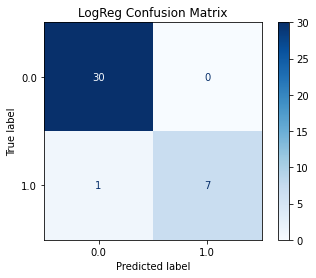

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')
plt.title('LogReg Confusion Matrix');

In [30]:
pickle.dump(lr, open("logreg.pkl", "wb"))

In [31]:
lr_unpickled = pickle.load(open("../models/logreg.pkl", "rb"))
lr_unpickled

LogisticRegression(max_iter=1000)

In [32]:
import basilica

BASILICA_KEY='29644820-0fb3-5c6f-bc91-4081ab51bd20'
BASILICA = basilica.Connection(BASILICA_KEY)

In [33]:
example_embedding = BASILICA.embed_sentence('The MARS rover just reported new and interesting data.', model='twitter')
example_embedding

[-0.546671,
 0.0720176,
 0.965037,
 -0.0141734,
 0.148564,
 0.402067,
 0.299184,
 0.467351,
 -0.194612,
 -0.203329,
 -0.310038,
 -0.0156886,
 0.300512,
 0.697871,
 -0.149118,
 -0.455528,
 0.148145,
 -0.193451,
 0.805491,
 0.29355,
 -0.0343418,
 -0.338425,
 0.0410723,
 -0.151088,
 -0.0393791,
 -0.0111782,
 0.0566098,
 -0.0874849,
 -0.0156435,
 0.128935,
 0.387847,
 0.174069,
 0.0683438,
 0.498223,
 -0.215831,
 0.331536,
 -0.293375,
 -0.222925,
 -0.466098,
 0.153575,
 -0.588026,
 -0.310979,
 0.237729,
 0.0934774,
 -0.0450073,
 -0.516037,
 -3.6644,
 -0.0287335,
 -0.493889,
 0.525983,
 0.0676955,
 -0.191744,
 0.203053,
 0.889872,
 0.192249,
 0.200181,
 -0.79184,
 -0.209034,
 -0.334528,
 -0.0612208,
 0.0179522,
 0.246728,
 0.341533,
 0.185971,
 -0.383213,
 0.0200898,
 0.533121,
 -0.103633,
 -0.0471425,
 0.0621885,
 0.1473,
 -0.0541013,
 0.0435526,
 0.52523,
 -0.572583,
 -1.12793,
 -0.270564,
 0.141022,
 0.647502,
 0.424365,
 -0.220242,
 0.373463,
 0.474465,
 -0.0077071,
 -0.13294,
 -0.03706

In [36]:
lr_unpickled.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0.])

In [37]:
lr_unpickled.predict_proba([example_embedding])

array([[0.57654239, 0.42345761]])

In [ ]:
 #0 : 'elonmusk' #1 : 's2t2'
    
# 57.7% chance that elonmusk said that